In [26]:
# import necessary packages
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

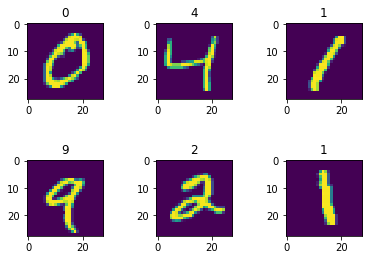

In [27]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load dataset
#FS
# show samples of the dataset
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [28]:
# more data exploration
print('trainig tensor shape {}'.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))
print('label tensor shape {} '.format(y_train.shape))

trainig tensor shape (60000, 28, 28)
Test data shape (10000, 28, 28)
label tensor shape (60000,) 


In [29]:
# data preprocessing 

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# Convert y to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [36]:
# build the network
# create model
model = Sequential()

model.add(Dense(image_vector_size/2,
                input_shape=x_train[0].shape,
                kernel_initializer='normal',
                activation='relu'))

model.add(Dense(num_classes,
                kernel_initializer='normal',
                activation='softmax'))
# Compile model
sgd = optimizers.SGD(lr=8)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                3930      
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
EPOCHES=5
BATCH_SIZE=32
history=model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  epochs=EPOCHES, 
                  batch_size=BATCH_SIZE,
                  verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 222us/step - loss: 8.2316 - acc: 0.4858 - val_loss: 5.8387 - val_acc: 0.6343
Epoch 2/5
60000/60000 [==============================] - 12s 204us/step - loss: 5.7013 - acc: 0.6428 - val_loss: 5.4735 - val_acc: 0.6580
Epoch 3/5
60000/60000 [==============================] - 13s 211us/step - loss: 5.4794 - acc: 0.6575 - val_loss: 5.2904 - val_acc: 0.6699
Epoch 4/5
60000/60000 [==============================] - 14s 238us/step - loss: 5.3436 - acc: 0.6666 - val_loss: 5.1942 - val_acc: 0.6761
Epoch 5/5
60000/60000 [==============================] - 15s 249us/step - loss: 5.2718 - acc: 0.6710 - val_loss: 5.1649 - val_acc: 0.6777


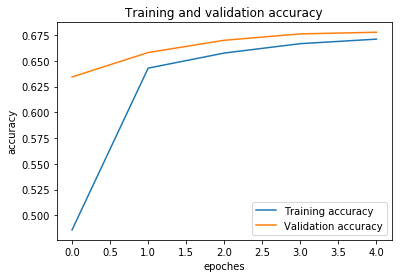

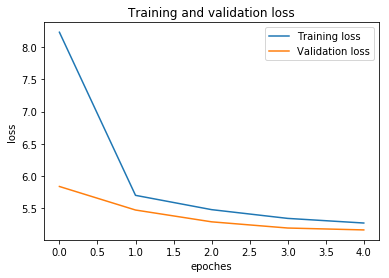

In [38]:
# Visualize loss and accuracy
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

In [39]:
# model evaluation
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 5.164876890563965)
('Test accuracy:', 0.6777)
